In [1]:
from keras.preprocessing import image
from keras.applications import resnet50, inception_v3, vgg16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import keras
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
def read_img(img_name):
    img64 = Image.open(img_name).convert('RGB')
    img32 = img64.resize((150, 150),Image.ANTIALIAS)
    data = np.array(img32)
    return data

In [3]:
images = []
labels = []
dir = './/tiny-imagenet-200//train//'
i = 0
for folder in os.listdir(dir):
    folderpath = dir + folder +'/images/'
    for file in os.listdir(folderpath):
        if file.endswith('.JPEG'):
            filedir = folderpath + file
            images.append(read_img(filedir))
            labels.append(i)
    i = i+1
        
seed = 100
np.random.seed(seed)
num_classes = 200
x = np.array(images)

y = np.array(labels)
# y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(70000, 150, 150, 3)
(70000,)
(30000, 150, 150, 3)
(30000,)


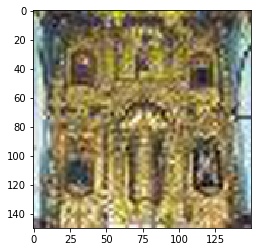

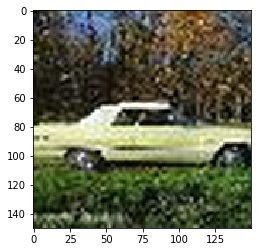

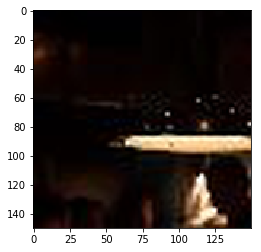

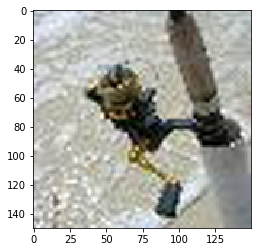

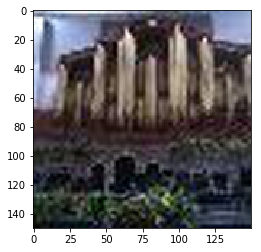

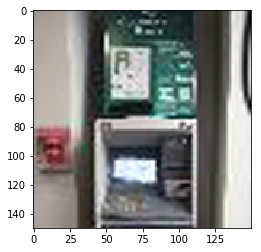

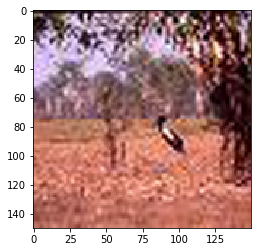

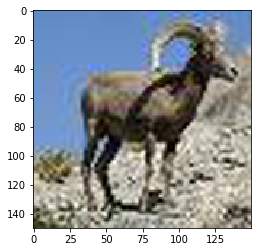

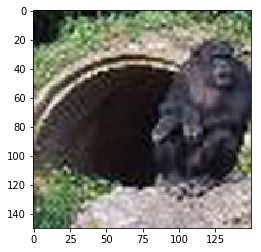

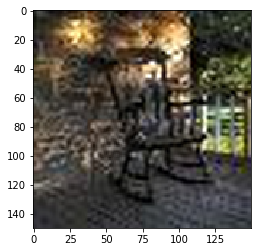

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(10):
    img = x_train[i+ 20]
    plt.imshow(img)
    plt.show()

In [5]:
num_classes = 200

base_model = inception_v3.InceptionV3

base_model = base_model(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])

87916544/87910968 [==============================] - 3s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
____________________________________________

In [6]:
hist = model.fit(x_train, y_train,
          epochs=50,
          batch_size=32,
          shuffle=True,
          validation_data=(x_test, y_test))

Train on 70000 samples, validate on 30000 samples
Epoch 1/50
70000/70000 [==============================] - 170s 2ms/step - loss: 3.4584 - acc: 0.3140 - val_loss: 15.9906 - val_acc: 0.0056
Epoch 2/50
70000/70000 [==============================] - 133s 2ms/step - loss: 2.5863 - acc: 0.4383 - val_loss: 16.0289 - val_acc: 0.0044
Epoch 3/50
70000/70000 [==============================] - 134s 2ms/step - loss: 2.3556 - acc: 0.4703 - val_loss: 16.0265 - val_acc: 0.0048
Epoch 4/50
70000/70000 [==============================] - 134s 2ms/step - loss: 2.2232 - acc: 0.4909 - val_loss: 15.9990 - val_acc: 0.0060
Epoch 5/50
70000/70000 [==============================] - 133s 2ms/step - loss: 2.1270 - acc: 0.5072 - val_loss: 16.0248 - val_acc: 0.0050
Epoch 6/50
70000/70000 [==============================] - 133s 2ms/step - loss: 2.0506 - acc: 0.5172 - val_loss: 16.0089 - val_acc: 0.0057
Epoch 7/50
70000/70000 [==============================] - 133s 2ms/step - loss: 1.9858 - acc: 0.5300 - val_loss: 16.

In [7]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_inceptionv3_model.h5'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\em940\Desktop\INFO7374\saved_models\keras_inceptionv3_model.h5 
30000/30000 [==============================] - 39s 1ms/step
Test loss: 16.04263661295573
Test accuracy: 0.004233333333333334


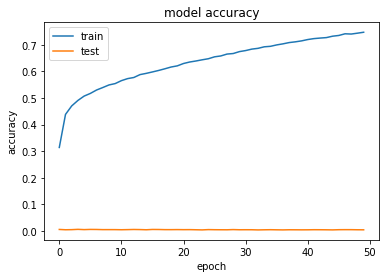

In [8]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

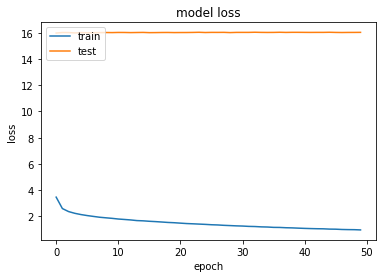

In [9]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()